Iteration   0: max. residual =         0.25
Iteration  10: max. residual =    0.0215626
Iteration  20: max. residual =    0.0114888
Iteration  30: max. residual =   0.00782563
Iteration  40: max. residual =   0.00585664
Iteration  50: max. residual =   0.00475146
Iteration  60: max. residual =   0.00394522
Iteration  70: max. residual =   0.00341197
Iteration  80: max. residual =   0.00297969
Iteration  90: max. residual =   0.00265807
Iteration 100: max. residual =   0.00239706
Iteration 110: max. residual =   0.00217305
Iteration 120: max. residual =   0.00199968
Iteration 130: max. residual =   0.00184798
Iteration 140: max. residual =   0.00171304
Iteration 150: max. residual =   0.00160144
Iteration 160: max. residual =    0.0015037
Iteration 170: max. residual =   0.00141463
Iteration 180: max. residual =   0.00133415
Iteration 190: max. residual =   0.00126678
Iteration 200: max. residual =   0.00120432
Iteration 210: max. residual =   0.00114638
Iteration 220: max. residual =  

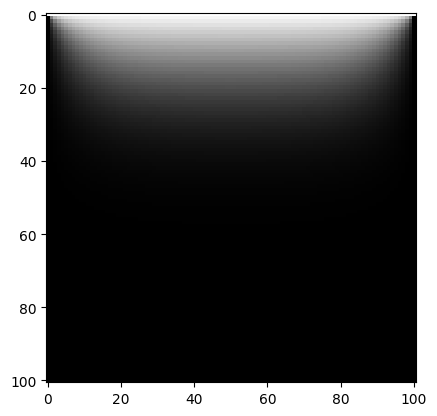

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
M = 100         # Grid squares on a side
V = 1.0         # Voltage at top wall
target = 3e-4   # Target accuracy

# Create arrays to hold potential values
phi = np.zeros([M+1,M+1],float)
phi[0,:] = V  # top wall
phiprime = np.zeros([M+1,M+1],float)

# Main loop
delta = 1.0
iteration = 0
while delta>target:
    phiprime[0, :] = phi[0, :]
    phiprime[-1, :] = phi[-1, :]
    phiprime[:, 0] = phi[:, 0]
    phiprime[:, -1] = phi[:, -1]
    phiprime[1:-1,1:-1] = (phi[2:, 1:-1] + phi[:-2, 1:-1] + phi[1:-1, :-2] + phi[1:-1, 2:]) / 4.0
    # Calculate new values of the potential
    # for i in range(M+1):
    #     for j in range(M+1):
    #         phiprime[i][j] = phi[i][j] if i == 0 or i == M or j == 0 or j == M else (phi[i+1][j] + phi[i-1][j] + phi[i][j+1] + phi[i][j-1]) / 4.0

    # Calculate maximum difference from old values
    delta = np.max(abs(phi-phiprime))
    if iteration % 10 == 0:
        print("Iteration %3d: max. residual = %12.6g" % (iteration, delta))

    # Swap the two arrays around
    phi,phiprime = phiprime,phi
    iteration += 1

# Make a plot
plt.imshow(phi)
plt.gray()
plt.show()
